## COVID Daily casualties Analysis Table and Heat Map 
   in order of daily casualties : Italy Spain US France UK Iran Netherlands 
   
   ### Daily Calculus  below: 
  - source : World Stats Evolution per Coutry & Type (John Hopkins)
     - Web https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series 
     - storage and computation resources thanks to  - http://Github.com , http://Jupyter.org  , http://MyBinder.org 

In [1]:
!pip install pandas seaborn
# initial installations 

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 10.0 MB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 215 kB 51.0 MB/s eta 0:00:01
     |████████████████████████████████| 509 kB 16.7 MB/s eta 0:00:01
     |████████████████████████████████| 20.2 MB 39.8 MB/s eta 0:00:01█▊                   | 8.0 MB 39.8 MB/s eta 0:00:01 | 16.8 MB 39.8 MB/s eta 0:00:01
     |████████████████████████████████| 12.4 MB 36.0 MB/s eta 0:00:01
     |████████████████████████████████| 26.1 MB 25.6 MB/s eta 0:00:01     |███████████████████████████▌    | 22.4 MB 25.6 MB/s eta 0:00:01
     |████████████████████████████████| 90 kB 10.4 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 6.4 MB/s  eta 0:00:01


In [2]:
 ##JH Source
! curl -OL https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   213  100   213    0     0   1745      0 --:--:-- --:--:-- --:--:--  1760
100 44110  100 44110    0     0   169k      0 --:--:-- --:--:-- --:--:--  169k


In [3]:
# ! egrep -e ',[0-9]{3,}$' -e ^Provi  -e ',[6-9].$' tim*dea*csv > over50.csv
! egrep -e ',[^,][^,][^,]+$' -e ^Provi  -e ',[6-9].$' tim*dea*csv > over50.csv
import pandas as pd
df=pd.read_csv('over50.csv')
df.set_index('Country/Region',inplace=True)  # .T
type(df)

pandas.core.frame.DataFrame

In [4]:
cols20 = df.columns[-13:].tolist()
idx = cols20 # cols21 = df.columns[-14:-1].tolist()
#display( )idx=['Country/Region']+cols20   #no need with set index
display(df[cols20] )

,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
Country/Region,,,,,,,,,,,,,
Austria,4,6,6,8,16,21,28,30,49,58,68,86,108
Belgium,14,21,37,67,75,88,122,178,220,289,353,431,513
Brazil,3,6,11,15,25,34,46,59,77,92,111,136,159
China,3122,3130,3133,3139,3153,3153,3160,3163,3169,3174,3177,3182,3186
Denmark,4,6,9,13,13,24,32,34,41,52,65,72,77
Ecuador,2,3,5,7,14,18,27,28,34,36,48,58,60
France,148,243,450,562,674,860,1100,1331,1696,1995,2314,2606,3024
Germany,28,44,67,84,94,123,157,206,267,342,433,533,645
Indonesia,19,25,32,38,48,49,55,58,78,87,102,114,122


In [5]:
#df['LastDay']=df[df.columns[-1]]-df[df.columns[-2]] 
df0=df[idx].copy()  #()
type(df)
#for (coln, cold) in df.iteritems():
#    print(coln, '->', cold)
for i in range(1,13):
         df0[df0.columns[-i]] =    (df0[df.columns[-i]]-df0[df0.columns[-i-1]]) # casualties last day

## COVID Daily deaths 
Spain Italy US France UK Netherlands Iran Germany (updated March-30th)   

In [6]:
df0.pop( df0.columns[0] )   # 0 
df9=df0.sort_values(by=[df.columns[-1]],ascending=False).head(9)
display(df9) 

,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
Country/Region,,,,,,,,,,,,
Spain,207,213,332,397,539,497,839,718,773,844,821,913
Italy,427,627,793,651,601,743,683,712,919,889,756,812
US,82,44,63,110,140,149,236,267,372,445,441,511
France,95,207,112,112,186,240,231,365,299,319,292,418
United Kingdom,66,40,56,48,54,87,43,113,181,260,209,180
Iran,149,149,123,129,127,122,143,157,144,139,123,117
Germany,16,23,17,10,29,34,49,61,75,91,100,112
Netherlands,18,30,30,43,34,63,80,78,112,93,132,93
Belgium,7,16,30,8,13,34,56,42,69,64,78,82


In [14]:
print(','.join('Mr%.0f' %x for x in range(18,30+1))  ,'\ndata-datasets="')
print('"\ndata-datasets="'.join(','.join('%.0f' %x for x in y) for y in df9.values) )

Mr18,Mr19,Mr20,Mr21,Mr22,Mr23,Mr24,Mr25,Mr26,Mr27,Mr28,Mr29,Mr30 
data-datasets="
207,213,332,397,539,497,839,718,773,844,821,913"
data-datasets="427,627,793,651,601,743,683,712,919,889,756,812"
data-datasets="82,44,63,110,140,149,236,267,372,445,441,511"
data-datasets="95,207,112,112,186,240,231,365,299,319,292,418"
data-datasets="66,40,56,48,54,87,43,113,181,260,209,180"
data-datasets="149,149,123,129,127,122,143,157,144,139,123,117"
data-datasets="16,23,17,10,29,34,49,61,75,91,100,112"
data-datasets="18,30,30,43,34,63,80,78,112,93,132,93"
data-datasets="7,16,30,8,13,34,56,42,69,64,78,82


In [8]:
dxy=df0.transpose()
display(dxy) #pivot('Country/Region')

Country/Region,Austria,Belgium,Brazil,China,Denmark,Ecuador,France,Germany,Indonesia,Iran,...,Netherlands,Philippines,Portugal,Romania,Spain,Sweden,Switzerland,Turkey,United Kingdom,US
3/19/20,2,7,3,8,2,1,95,16,6,149,...,18,-2,1,0,207,1,13,2,66,82
3/20/20,0,16,5,3,3,2,207,23,7,149,...,30,1,3,0,213,5,13,1,40,44
3/21/20,2,30,4,6,4,2,112,17,6,123,...,30,1,6,0,332,4,21,5,56,63
3/22/20,8,8,10,14,0,7,112,10,10,129,...,43,6,2,3,397,1,23,21,48,110
3/23/20,5,13,9,0,11,4,186,29,1,127,...,34,8,9,4,539,4,22,7,54,140
3/24/20,7,34,12,7,8,9,240,34,6,122,...,63,2,10,4,497,11,2,7,87,149
3/25/20,2,56,13,3,2,1,231,49,3,143,...,80,3,10,6,839,26,31,15,43,236
3/26/20,19,42,18,6,7,6,365,61,20,157,...,78,7,17,6,718,15,38,16,113,267
3/27/20,9,69,15,5,11,2,299,75,9,144,...,112,9,16,3,773,28,40,17,181,372
3/28/20,10,64,19,3,13,12,319,91,15,139,...,93,14,24,11,844,0,33,16,260,445


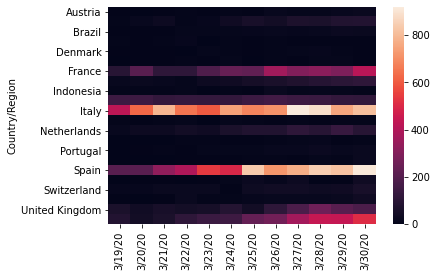

In [10]:
import seaborn as sns
%matplotlib inline
sns.heatmap(df0)#, annot=True

###  Daily casualties Heat Map 
   in order of daily casualties : Italy Spain US France UK Iran Netherlands 

22 8.666666666666666


Country/Region
Austria           1.4
Belgium           1.4
Brazil            1.5
China             0.8
Denmark           0.7
Ecuador           1.5
France            1.1
Germany           1.6
Indonesia         0.7
Iran              0.8
Italy             1.0
Korea, South      1.1
Netherlands       1.2
Philippines       0.6
Portugal          1.2
Romania           3.1
Spain             1.2
Sweden            1.0
Switzerland       1.2
Turkey            1.8
United Kingdom    1.3
US                1.5
dtype: float64

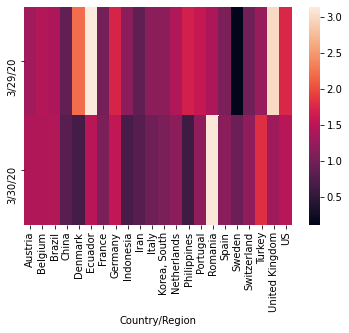

In [11]:
print( len(dxy.columns) ,dxy['Austria'].tail(20).mean() ) #   with ()   sns.heatmap(dxy)
drel=dxy.copy()
for r in drel.columns:
    #print (r,    drel[r].tail(5).mean() )
    drel[r] =  drel[r] / drel[r].tail(11).mean()
    
dinc=df0.copy()  #increase 
Days2 = dxy.tail(2).mean() 
Days4 = dxy.tail(5).head(2).mean() 
increaserate=round(Days2/Days4,1)
display( increaserate )
   
for i in range(1,6):
         dinc[df0.columns[-i]] =    (df0[df0.columns[-i]]+df0[df0.columns[-i-1]])  /  (df0[df0.columns[-i-4]]+df0[df0.columns[-i-3]])  
        
sns.heatmap(dinc.transpose().tail(2))    

In [12]:
print("By worst aspect due exponential increase: Sweden UK US Belgium Germany \n Strangely constant : Iran , Recovered: China ")
#drel.loc[['3/27/20']].transpose().sort_values(by=[df.columns[-1]],ascending=False)
drel.iloc[[-1]].transpose().sort_values(by=[df.columns[-1]],ascending=False)

By worst aspect due exponential increase: Sweden UK US Belgium Germany 
 Strangely constant : Iran , Recovered: China 


,3/30/20
Country/Region,
Romania,3.723077
Sweden,2.933333
Turkey,2.466667
Austria,2.372549
Germany,2.049917
Switzerland,2.040881
US,2.023398
Belgium,1.833333
Portugal,1.686131


In [13]:
%matplotlib inline
#dxy.plot(xticks=dxy.index,yticks=dxy.Austria)